<a href="https://colab.research.google.com/github/egonloch/DNC/blob/main/Desafio_4_Egon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
#importação dos dados
dados = pd.read_csv('/content/MKT.csv')

In [ ]:
#analise de quais dados/colunas existem
dados.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#analise se o tipo dos dados são compativeis com os numeros apresentados
dados.dtypes

youtube      float64
facebook     float64
newspaper    float64
sales        float64
dtype: object

In [ ]:
#analise da existencia ou não de numeros nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
#analise de varias formas estatisticas os dados
#percebesse que não faz sentido a colula sales ter valores menores e youtube maiores, portanto deve ter acontecido um erro e as colunas foram trocadas de lugar
dados.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
#troca de nome das colunas para corregir os dados
dados = dados.rename(columns={"youtube": "vendas", "sales": "youtube"})
dados.head()

,vendas,facebook,newspaper,youtube
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
#criação de uma coluna de gastos totais em publicidade para melhor analise
colunas_gastos = ['youtube', 'facebook', 'newspaper']
dados['gasto_total'] = dados[colunas_gastos].sum(axis=1)
dados.head()

,vendas,facebook,newspaper,youtube,gasto_total
0,84.72,19.20,48.96,12.60,80.76
1,351.48,33.96,51.84,25.68,111.48
2,135.48,20.88,46.32,14.28,81.48
3,116.64,1.80,36.00,11.52,49.32
4,318.72,24.00,0.36,20.88,45.24


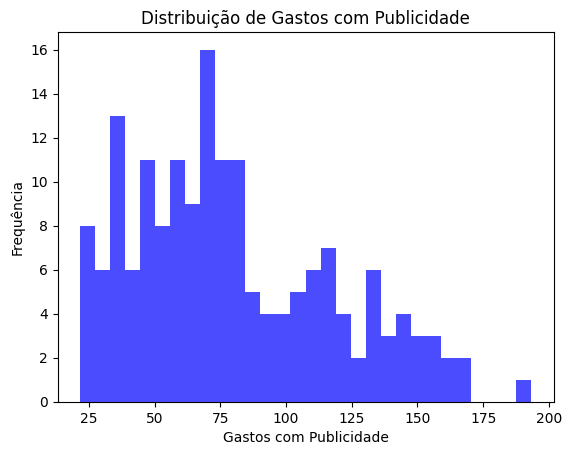

In [ ]:
#criação de um histograma da frequencia de gastos com publicidade
plt.hist(dados['gasto_total'], bins=30, color='blue', alpha=0.7)
plt.title('Distribuição de Gastos com Publicidade')
plt.xlabel('Gastos com Publicidade')
plt.ylabel('Frequência')
plt.show()
#percebesse que existe uma frequencia maior de menores gastos com publicidade

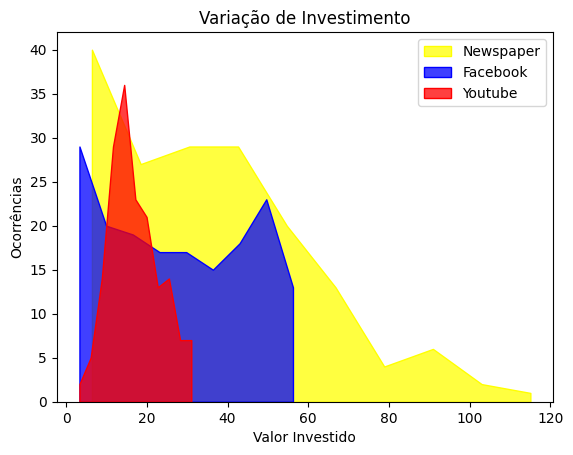

In [ ]:
#criação de um histograma da variação de investimentos com diferentes tipos de publicidade
sns.histplot(data=dados, x="newspaper", color="yellow", element="poly", label="Newspaper")
sns.histplot(data=dados, x="facebook", color="blue", element="poly", label="Facebook")
sns.histplot(data=dados, x="youtube", color="red", element="poly", label="Youtube")

plt.ylabel("Ocorrências")
plt.xlabel("Valor Investido")
plt.title("Variação de Investimento")
plt.legend()
plt.show()
#percebesse que os valores investidos com youtube são menores que facebook e newspaper

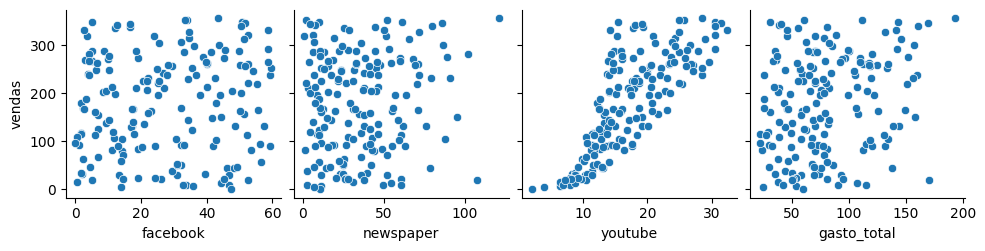

In [ ]:
#criação de graficos com as relações pareadas do conjunto de dados.
sns.pairplot(dados, x_vars=['facebook', 'newspaper', 'youtube', 'gasto_total'], y_vars=['vendas'])
#Os graficos mostram que a unica que apresenta uma linha de tendencia é o youtube
#Quanto maior investimento com youtube, maior são as vendas

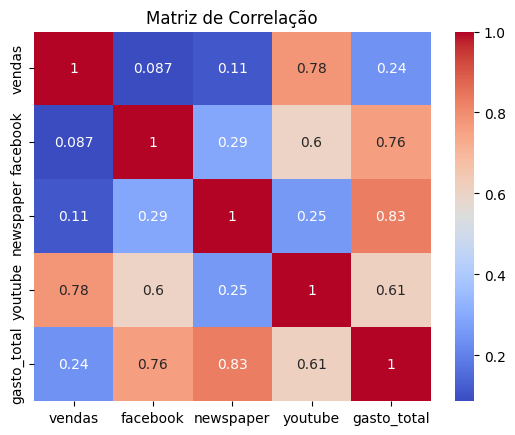

In [ ]:
#criação da matrix de correção dos dados
correlation_matrix = dados.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
#pela matriz de correlação percebesse que os gastos com youtube são os que mais tem correlação com as vendas
#enquanto jornal e facebook tem baixas correlações com vendas, mas altas com os gastos.

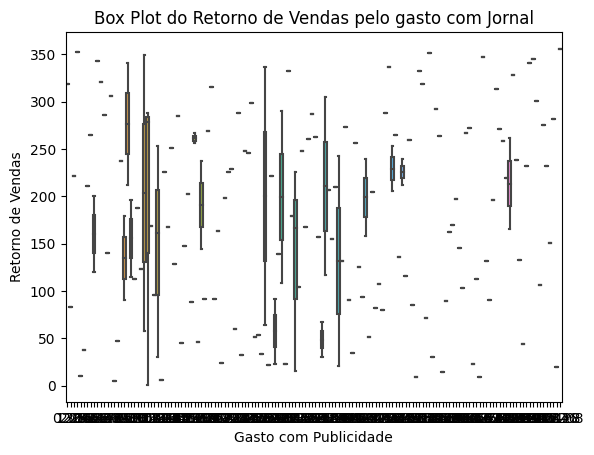

In [ ]:
#criação de um box plot de newspaper com vendas
sns.boxplot(x=dados['newspaper'], y=dados['vendas'])
plt.title('Box Plot do Retorno de Vendas pelo gasto com Jornal')
plt.xlabel('Gasto com Publicidade')
plt.ylabel('Retorno de Vendas')
plt.show()
#nao mostra uma tendencia, valores dispersos

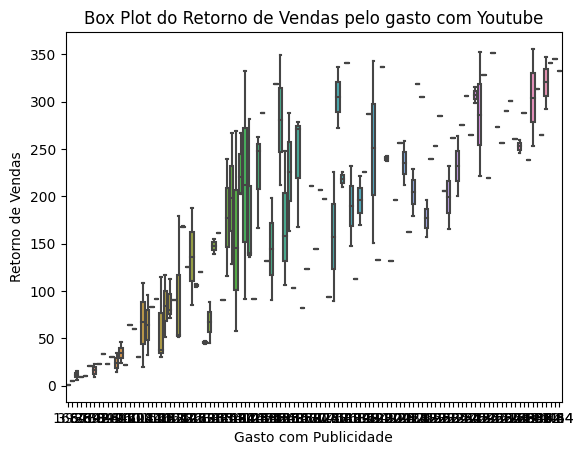

In [ ]:
#criação de um box plot de youtube com vendas
sns.boxplot(x=dados['youtube'], y=dados['vendas'])
plt.title('Box Plot do Retorno de Vendas pelo gasto com Youtube')
plt.xlabel('Gasto com Publicidade')
plt.ylabel('Retorno de Vendas')
plt.show()
#o box plot mostra que existe uma tendencia de quanto maior os gasto com essa publicidade maior o retorno de vendas

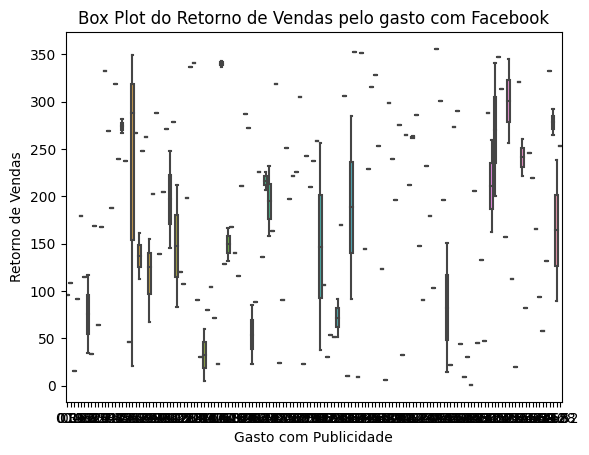

In [ ]:
#criação de um box plot de facebook com vendas
sns.boxplot(x=dados['facebook'], y=dados['vendas'])
plt.title('Box Plot do Retorno de Vendas pelo gasto com Facebook')
plt.xlabel('Gasto com Publicidade')
plt.ylabel('Retorno de Vendas')
plt.show()
#o box plot nao mostra uma tendencia, com valores bem dispersos

In [ ]:
#inicio da etapa de modelagem, determinando o X e Y
x = dados[['facebook', 'newspaper', 'youtube']]
y = dados['vendas']

In [ ]:
#criação do modelo
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.75, test_size = 0.25, random_state = 22)
#os valores foram alterados até conseguir mais de 90% do r2

In [ ]:
#impressão das dimensões dos dados de treinamento
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 3)
(43, 3)
(128,)
(43,)


In [ ]:
#criação modelo de regressão linear
lm = LinearRegression()

In [ ]:
#treinamento do modelo de regressão linear
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
#previsão com base no modelo de regressão linear treinado
y_pred = lm.predict(x_test)

In [ ]:
#cálculo do coeficiente de determinação
r = r2_score(y_test, y_pred)

In [ ]:
#impressão do valor do r²
print(f"O valor do r2 é de {round(r*100)}%")

O valor do r2 é de 91%


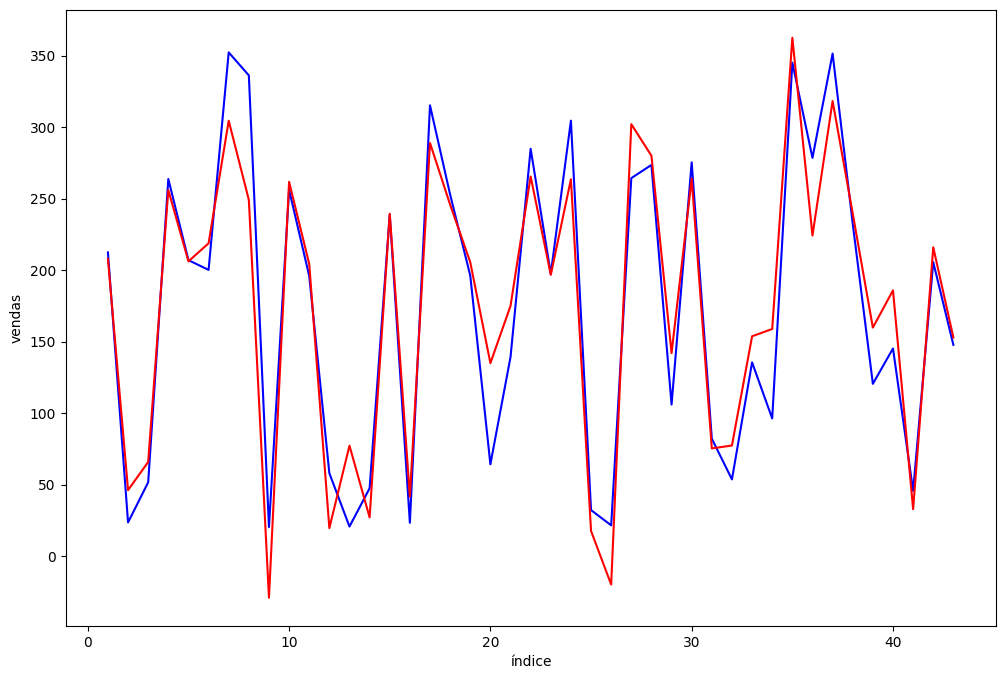

In [ ]:
#criação de um grafico de comparação entre os dados reais e o de previsão criado
c = list(i for i in range(1, 44))
fig = plt.figure(figsize=(12, 8))
plt.plot(c, y_test[:43], color="blue")
plt.plot(c, y_pred, color="red")
plt.xlabel("índice")
plt.ylabel("vendas")
plt.show()



In [ ]:
#solicita ao usuário que insira os valores gastos em publicidade nas plataformas para fazer uma previsão com base nessas entradas.
facebook = float(input("Digite o valor gasto no Facebook: "))
newspaper = float(input("Digite o valor gasto no newspaper: "))
youtube = float(input("Digite o valor gasto no YouTube: "))
entrada = [[facebook, newspaper, youtube]]
entrada_array = np.array(entrada)
resultado = lm.predict(entrada_array)
print("O valor de vendas será de:", resultado[0])


Digite o valor gasto no Facebook: 5
Digite o valor gasto no newspaper: 5
Digite o valor gasto no YouTube: 10
O valor de vendas será de: 130.49466501790863


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
